In [20]:
import networkx as nx
from pyvis.network import Network
import pandas as pd
import math
import matplotlib.pyplot as plt

In [21]:
qantas_df = pd.read_excel('./raw_data/cartel_shareholders/Qantas.xls', sheet_name='Results_QAN-AU_4_8_12_16_2')

qantas_df["Cartel Name"] = "Qantas"

qantas_df.head()

,% O/S - QAN-AU 31-Dec-2011,% O/S - QAN-AU 31-Dec-2010,% O/S - QAN-AU 31-Dec-2009,% O/S - QAN-AU 31-Dec-2008,% O/S - QAN-AU 31-Dec-2007,% O/S - QAN-AU 31-Dec-2006,% O/S - QAN-AU 31-Dec-2005,% O/S - QAN-AU 31-Dec-2004,% O/S - QAN-AU 31-Dec-2003,% O/S - QAN-AU 31-Dec-2002,...,Filing Type - QAN-AU 31-Dec-2004,Filing Type - QAN-AU 31-Dec-2003,Filing Type - QAN-AU 31-Dec-2002,Filing Type - QAN-AU 31-Dec-2001,Filing Type - QAN-AU 31-Dec-2000,Filing Type - QAN-AU 31-Dec-1999,Filing Type - QAN-AU 31-Dec-1998,Filing Type - QAN-AU 31-Dec-1997,Parent Firm,Cartel Name
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,Aggregate MFs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qantas
1,0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qantas
2,0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qantas
3,NaN,NaN,NaN,0.03,0.03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qantas
4,0.03,0.04,0.05,0.07,0.00,0.03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qantas


In [22]:
# Remove completely empty columns and rows
qantas_df_cleaned = qantas_df.dropna(how='all').dropna(axis=1, how='all')

# Replace Column names for better readability
new_columns = []
for col in qantas_df_cleaned.columns:
    new_columns.append(str.lower((col.replace('- QAN-AU ', '').replace(' ', '_'))))

# Replace Column names
qantas_df_cleaned.columns = new_columns

# Print Column names
for col in qantas_df_cleaned.columns:
    print(col)

%_o/s_31-dec-2011
%_o/s_31-dec-2010
%_o/s_31-dec-2009
%_o/s_31-dec-2008
%_o/s_31-dec-2007
%_o/s_31-dec-2006
%_o/s_31-dec-2005
%_o/s_31-dec-2004
%_o/s_31-dec-2003
%_o/s_31-dec-2002
%_o/s_31-dec-2001
%_o/s_31-dec-2000
%_o/s_31-dec-1999
%_o/s_31-dec-1998
%_o/s_31-dec-1997
investor_name
pos_31-dec-2011
pos_31-dec-2010
pos_31-dec-2009
pos_31-dec-2008
pos_31-dec-2007
pos_31-dec-2006
pos_31-dec-2005
pos_31-dec-2004
pos_31-dec-2003
pos_31-dec-2002
pos_31-dec-2001
pos_31-dec-2000
pos_31-dec-1999
pos_31-dec-1998
pos_31-dec-1997
investment_style
investor_sub-type
filing_type_31-dec-2011
filing_type_31-dec-2010
filing_type_31-dec-2009
filing_type_31-dec-2008
filing_type_31-dec-2007
filing_type_31-dec-2006
filing_type_31-dec-2005
filing_type_31-dec-2004
filing_type_31-dec-2003
filing_type_31-dec-2002
filing_type_31-dec-2001
filing_type_31-dec-2000
filing_type_31-dec-1999
filing_type_31-dec-1998
filing_type_31-dec-1997
cartel_name


In [31]:
# Select only columns that contain ownership information
ownership_columns = [col for col in qantas_df_cleaned.columns if "%_o/s_" in col or "pos_" in col]

# Convert ownership columns to numeric
qantas_df_cleaned[ownership_columns] = qantas_df_cleaned[ownership_columns].apply(pd.to_numeric, errors='coerce')

ownership_columns_percentage = [col for col in ownership_columns if "%_o/s_" in col]

ownership_columns_absolute = [col for col in ownership_columns if "pos_" in col]

# Calculate mean ownership percentage
mean_ownership_percentage = qantas_df_cleaned[ownership_columns_percentage].mean()
# Calculate mean ownership absolute
mean_ownership_absolute = qantas_df_cleaned[ownership_columns_absolute].mean()

# sort by index
mean_ownership_percentage = mean_ownership_percentage.sort_index()
mean_ownership_absolute = mean_ownership_absolute.sort_index()

# Print mean ownership
print(mean_ownership_absolute)

pos_31-dec-1997    2.523100e+07
pos_31-dec-1998    3.047365e+07
pos_31-dec-1999    1.736305e+07
pos_31-dec-2000    1.423078e+07
pos_31-dec-2001    1.222740e+07
pos_31-dec-2002    9.494134e+06
pos_31-dec-2003    8.340409e+06
pos_31-dec-2004    5.030507e+06
pos_31-dec-2005    6.894518e+06
pos_31-dec-2006    8.303785e+06
pos_31-dec-2007    8.363305e+06
pos_31-dec-2008    1.209923e+07
pos_31-dec-2009    9.984804e+06
pos_31-dec-2010    9.862715e+06
pos_31-dec-2011    1.040817e+07
dtype: float64


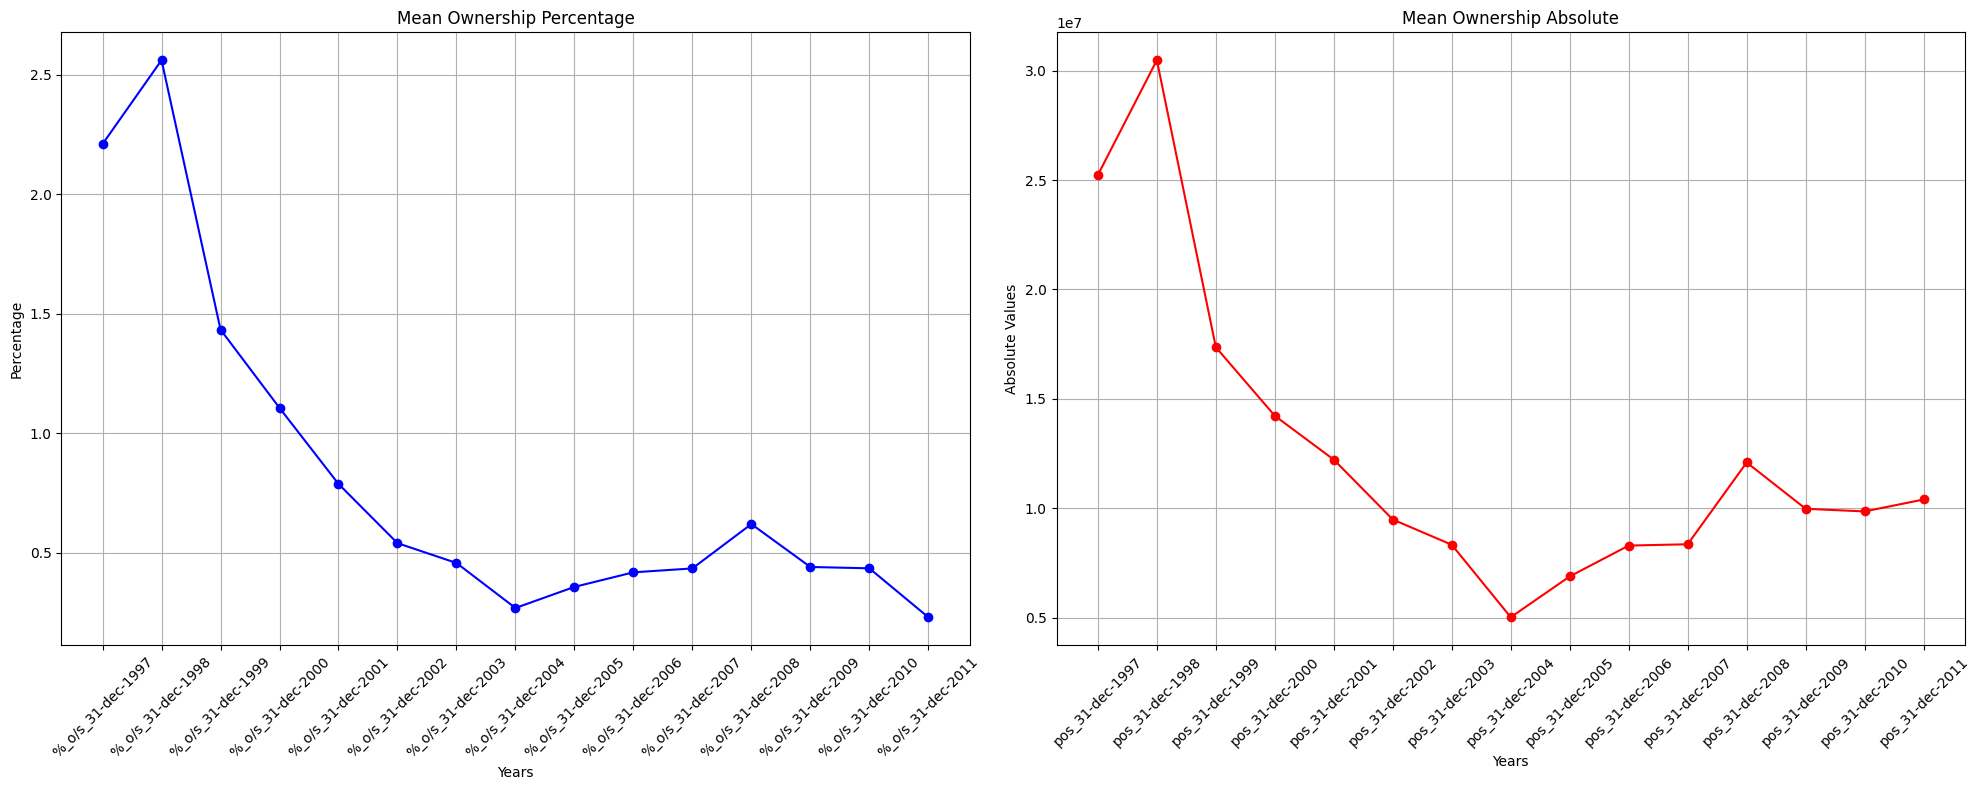

In [32]:
# Create visualization with 2 graphics one showing percentage ownership and the other showing absolute ownership
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].plot(mean_ownership_percentage.index, mean_ownership_percentage.values, 'o', linestyle='-', color='b')
axes[0].set_title('Mean Ownership Percentage')
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('Years')
axes[0].grid(True)

axes[1].plot(mean_ownership_absolute.index, mean_ownership_absolute.values, 'o', linestyle='-', color='r')
axes[1].set_title('Mean Ownership Absolute')
axes[1].set_ylabel('Absolute Values')
axes[1].set_xlabel('Years')
axes[1].grid(True)

# turn x-axis labels for better readability
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Show plot
plt.tight_layout()
plt.show()